# Exploration 07
---
## 인물사진 만들기

In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

## 1. 인물사진

(345, 600, 3)


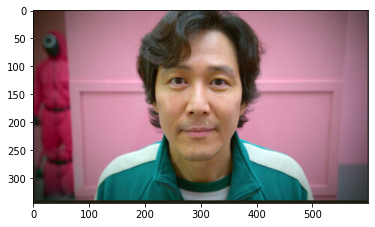

In [2]:
# 이미지 불러오기
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 모델 설치
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f561ef260d0>)

In [4]:
# 사용할 세그멘테이션 모델 생성
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [5]:
# 모델에 이미지 입력
segvalues, output = model.segmentAsPascalvoc(img_path)

In [6]:
# PASCAL VOC 데이터 라벨 종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv']
len(LABEL_NAMES)

21

`background`를 제외하면 20개의 클래스가 존재

인물사진에서 검출할 영역은 사람이므로, `person` 만 추출한다.

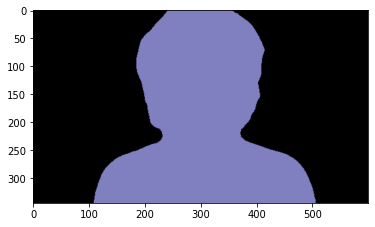

In [7]:
plt.imshow(output)
plt.show()

In [8]:
segvalues

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [9]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [10]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [11]:
colormap[15] # BGR 순서 --> RGB 순서로 바꿔서 입력해야 함.

array([192, 128, 128])

In [12]:
seg_color = (128,128,192)

(345, 600)


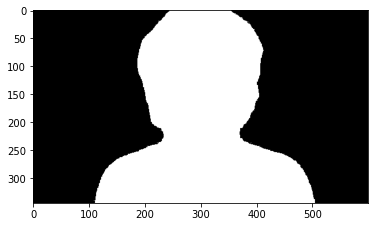

In [13]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

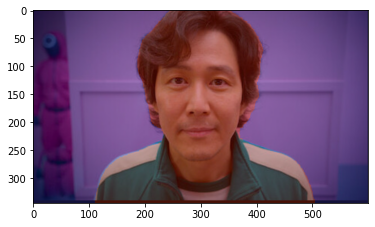

In [14]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꾸기
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꾸기
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합차가
# 0.6과 0.4는 두 이미지를 섞는 비율
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### 배경 흐리게 하기

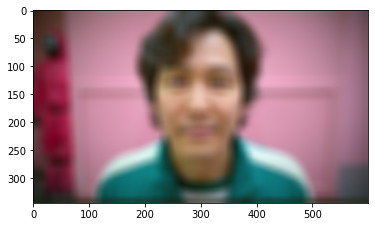

In [15]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (20,20))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

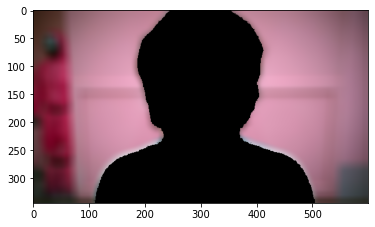

In [16]:
# 세그멘테이션 마스크를 이용해 배경만 추출하기
# bitewise_not 함수를 이용하면 이미지가 반전된다. 여기서는 True, False 값을 서로 바꿔주어 배경은 255, 사람은 0
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

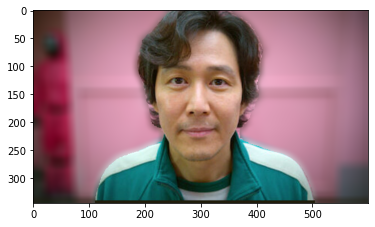

In [17]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 2. 고양이사진


In [18]:
plt.clf()

<Figure size 432x288 with 0 Axes>

(560, 1440, 3)


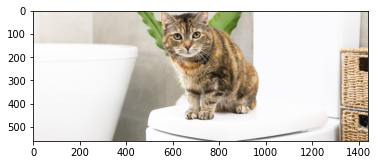

In [19]:
# 이미지 불러오기
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image_cat.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [20]:
# 모델에 이미지 입력
segvalues, output = model.segmentAsPascalvoc(img_path)

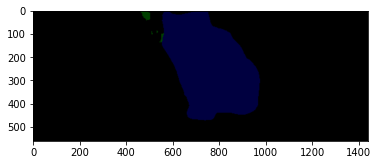

In [21]:
plt.imshow(output)
plt.show()

In [22]:
segvalues

{'class_ids': array([ 0,  8, 16]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [23]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat
pottedplant


In [24]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [25]:
colormap[8] # BGR 순서 --> RGB 순서로 바꿔서 입력해야 함.

array([64,  0,  0])

In [26]:
seg_color = (0,0,64)

(560, 1440)


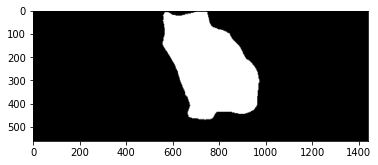

In [27]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

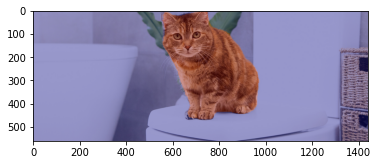

In [28]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꾸기
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꾸기
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합차가
# 0.6과 0.4는 두 이미지를 섞는 비율
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

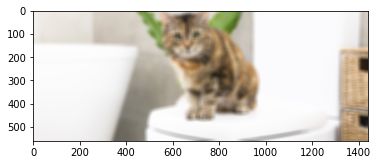

In [29]:
# (13,13)은 blurring kernel size를 의미
img_orig_blur = cv2.blur(img_orig, (20,20))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

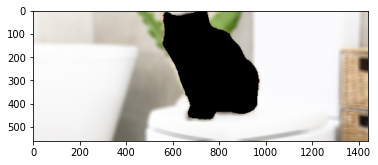

In [30]:
# 세그멘테이션 마스크를 이용해 배경만 추출하기
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

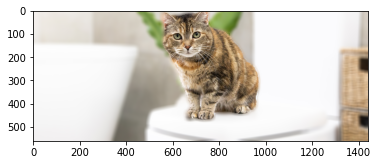

In [31]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 회고

## 모델에 대한 평가

#### 모델에 대한 평가에 앞서, 이번 프로젝트에서 사용되었던 세그멘테이션(Segmentation)에 대해서 알아보자.
<Br>
세그멘테이션은 이미지 픽셀에 라벨을 할당하여, '공통적인 특징'을 이용해 픽셀 단위로 관심 객체를 추출하는 방법이다. 세그멘테이션은 태스크에 따라 다양한 기준으로 객체를 추출한다. 본 프로젝트에서 진행한 세그멘티이션은 '시맨틱 세그멘테이션(Semantic Segmentation)'으로 우리가 인식하느 세계처럼 물리적 단위로 인식하는 세그멘테이션을 의미한다. 시맨틱 세그멘티에션은 이미지에서 픽셀을 사람, 자동차 등의 물리적 단위로 분류하는 방법이다.
 

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/E-14-10-1.png)


노드의 샘플사진을 살펴보면 인물 뒤로 모델이 입고있지 않은 옷도 인물과 함께 추출되어 blur처리가 되지 않은 것을 볼 수 있다. 이는 본 프로젝트에서 사용한 시맨틱 세그멘테이션이 라벨링을 잘못 하면서 발생한 것으로 보인다. 특히 인물이 입고있는 옷색깔과 blur처리가 되지않은 옷 색깔이 모두 검정색이라 픽셀단위의 특징부여에 있어 제대로 처리되지 않은 것으로 보인다.

이러한 문제점을 해결할 수 있는 방법으로 3D 이미지 센서를 이용할 수 있다. 일반적인 의미의 얕은 피사계심도 촬영은 좁은 화각, 낮은 조리개 값에서, 대상과 배경간의 거리의 차이가 두드러질 때 잘 나타난다. 여기서 주목할 점은 바로 '거리(distance)' 라고 할 수 있다. 

기존의 평면2D 이미지 정보에서 거리 정보를 더한 3D 이미지 정보가 있다면, 이미지 내의 대상간의 거리를 이용하여 유사한 거리에 있는 이미지 끼리 추출할 수 있고, 이를 오늘 진행했던 세그멘테이션 방법과 합치면 보다 훌륭하게 대상을 배경으로 부터 분리 할 수 있을 것이다.

![](https://www.adobe.com/content/dam/cc/us/en/creative-cloud/photography/discover/Shallow-Depth-of-Field/1ODERED_B1_shallowdepth_P3b_438x447.jpg.img.jpg)
<br>
또한 위 사진을 보면 대상간의 거리에 멀어질수록 배경이 blur되는 효과가 더 강해지는 것을 볼 수 있다. <br>이는 거리 정보에 따라 다르게 blur처리를 할 수 있음을 의미하며 보다 자연스러운 인물사진을 구현할 수 있을 것으로 기대된다.

## 후기

이번 프로젝트는 지난 스티커 사진 붙이기 등의 프로젝트보다는 보다 수월하게 진행했던 것 같다. <br>다만 사진에 따라 완벽하게 blur처리 되지 않는 것을 볼 수 있었으며 평가에서 언급한 대로 3D 이미지 센서를 활용했을 때는 얼마나 자연스럽게 인물사진을 구현할 수 있을 지가 궁금하다.

## Reference

[1] https://www.adobe.com/content/dam/cc/us/en/creative-cloud/photography/discover/Shallow-Depth-of-Field/1ODERED_B1_shallowdepth_P3b_438x447.jpg.img.jpg <br>
[2] https://news.skhynix.co.kr/post/next-gen-3d